## <font color=blue> First we import the required packages

In [1]:
import pandas as pd
from pandas_datareader import data as web# For importing data; this code may change depending on pandas version
import datetime as dt
from datetime import date   # for input the date
import matplotlib.pyplot as plt # for visualization
import csv # to save (download) the data at the end

import numpy as np # for lineal model
from sklearn import linear_model


# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

Populating the interactive namespace from numpy and matplotlib


## <font color=blue> Read and explore the csv file

We will use stock data from Citi bank (between March 3rd and April 4th (2017)) to train our linear regression model. In a previous module I described how to read data from yahoo and google finance, and how to dowload such data bases to csv files. Here we load such data (this can be done with any csv file). In our case, it information from Citi bank,  Citidata.csv

In [2]:
df=pd.read_csv("/home/cristobal/Citidata.csv")

In [3]:
print(df.head(5))
list(df.columns.values)

         Date       Open       High        Low      Close  Adj Close    Volume
0  2017-03-03  60.389999  61.250000  60.330002  61.000000  60.557163  15178600
1  2017-03-06  60.799999  60.880001  60.259998  60.279999  59.842388  14979400
2  2017-03-07  60.189999  60.709999  59.779999  60.500000  60.060795  17297800
3  2017-03-08  61.560001  62.529999  61.060001  61.110001  60.666367  30724000
4  2017-03-09  61.360001  62.090000  61.230000  61.549999  61.103172  21429300


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

## <font color=blue> Create a column representing days with integer number (as an index)

In [4]:
n=len(df.index)
linspacecol = np.linspace(0, n, n, endpoint=False).astype(int)
df['day']=linspacecol

Make a reallity check

In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,day
18,2017-03-29,59.529999,59.880001,59.270000,59.389999,58.958851,13457400,18
19,2017-03-30,59.389999,60.830002,59.360001,60.509998,60.070721,14886200,19
20,2017-03-31,60.310001,60.509998,59.790001,59.820000,59.385731,14407900,20
21,2017-04-03,59.930000,60.090000,58.650002,59.680000,59.246746,15460500,21
22,2017-04-04,59.290001,59.950001,59.200001,59.680000,59.246746,9745600,22


In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day
0,2017-03-03,60.389999,61.250000,60.330002,61.000000,60.557163,15178600,0
1,2017-03-06,60.799999,60.880001,60.259998,60.279999,59.842388,14979400,1
2,2017-03-07,60.189999,60.709999,59.779999,60.500000,60.060795,17297800,2
3,2017-03-08,61.560001,62.529999,61.060001,61.110001,60.666367,30724000,3
4,2017-03-09,61.360001,62.090000,61.230000,61.549999,61.103172,21429300,4


##  <font color=blue>So we will predict stock at day 23 (the next day)

The reason to define this function is to emphasize that how to write a function that retunrns more than one arguments. In this case, the **input** are **dates** and **prices** as integers, and the value (or day) **x** that we wan **to estimate**. The **output** of the code are **two coefficients** representing the best linear approximation obatained by training the model with the given points and _minimizing_ the residual sum of squares (**SSD**). In other words, the first coeffciemt is the slope of the line and the second represents the intercept with the y axis  

In [7]:

def predict_price(dates,prices,x):
    linear_mod = linear_model.LinearRegression() #defining the linear regression model
    dates = np.reshape(dates,(len(dates),1)) # converting to matrix of n X 1
    prices = np.reshape(prices,(len(prices),1))
    linear_mod.fit(dates,prices) #fitting the data points in the model
    predicted_price =linear_mod.predict(x)
    return predicted_price[0][0],linear_mod.coef_[0][0] ,linear_mod.intercept_[0]# return prediction and coefficients

In [8]:
dates=df['day']

In [9]:
prices=df['Close']

##  <font color=blue>Short-term stock prediction

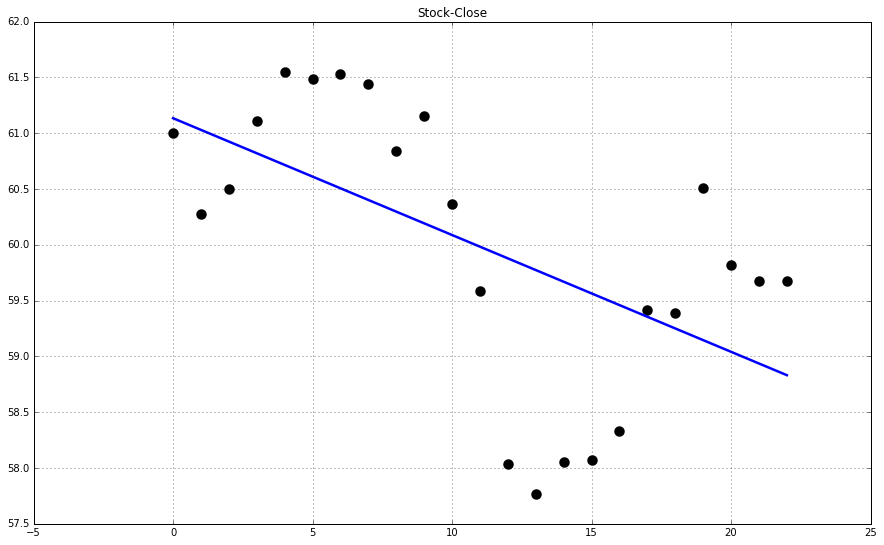

In [10]:


linear_mod = linear_model.LinearRegression()
dates = np.reshape(dates,(len(dates),1)) # converting to matrix of n X 1
prices = np.reshape(prices,(len(prices),1))
linear_mod.fit(dates,prices) #fitting the data points in the model

plt.title('Stock-Close')
plt.grid(True)
plt.scatter(dates,prices,color='black',linewidth=6) #plotting the initial datapoints 
plt.plot(dates,linear_mod.predict(dates),color='blue',linewidth=2.5, linestyle="-") #plotting the line made by linear regression
plt.show()


##  <font color=blue> Predicted value and regression coefficients

In [11]:
 
predicted_price, coefficient, constant = predict_price(dates,prices,23)  
print ("The stock open price for 4th August 2017 is: $",str(predicted_price))
print ("The regression coefficient is ",str(coefficient),", and the constant is ", str(constant))
print ("the relationship equation between dates and prices is: price = ",str(coefficient),"* date + ",str(constant))

The stock open price for 4th August 2017 is: $ 58.7270746838
The regression coefficient is  -0.104664055336 , and the constant is  61.1343479565
the relationship equation between dates and prices is: price =  -0.104664055336 * date +  61.1343479565


##  <font color=blue> Periodicity and long-term prediction

To discuss this we load 12 months of data for the same company

In [12]:
start_date = dt.date(2016,4,4)  #year, month, day
end_date = dt.date(2017,4,4) 
print(start_date.strftime("%Y"))
print(end_date)
CitiYear= web.DataReader("C", "yahoo", start_date, end_date)

2016
2017-04-04


In [13]:
CitiYear.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-30,59.389999,60.830002,59.360001,60.509998,60.070721,14886200
2017-03-31,60.310001,60.509998,59.790001,59.820000,59.385731,14407900
2017-04-03,59.930000,60.090000,58.650002,59.680000,59.246746,15460500
2017-04-04,59.290001,59.950001,59.200001,59.680000,59.246746,9745600
2017-04-05,60.500000,61.020000,59.529999,59.590000,59.157402,20295200


##  <font color=blue> Measuring Error 

After downloading more information, we can check our prediction. The stock closing price for the next day was

In [14]:
m=len(CitiYear.index)
real_stock_data=CitiYear['Close'][m-1]
print(real_stock_data)


59.59


Then, the error is 

In [15]:
error=real_stock_data-predicted_price
print(error)

0.862925316206


In our next module we will discuss more about how to measure different types of error (Residual Sum of Squares, Mean Absolute Deviation, Root Mean Squared Error, etc)

As you can see in the graph below of the stock data for the entire year 2016-2017. There are certain patterns that are repeated during seasons. It will be nice to combine linear features and "periodicity" features for better predcition.

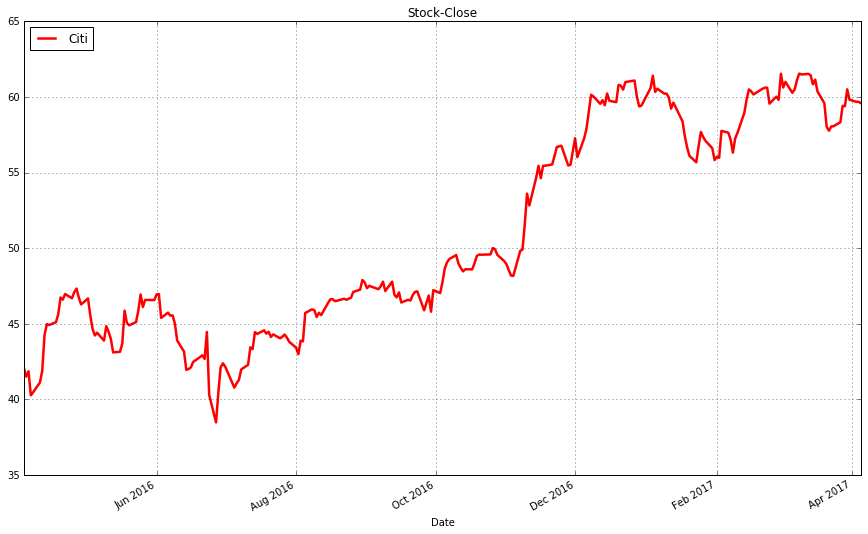

In [16]:

plt.title('Stock-Close')
plt.grid(True)
CitiYear["Close"].plot(grid = True, color="red",  linewidth=2.5, linestyle="-", label="Citi")
plt.legend(loc='upper left')